In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='ticks', context='poster')
#sns.set(style="whitegrid")
#plt.style.use('fivethirtyeight')
plt.rcParams['grid.linestyle'] = '--'

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Rimozione eventuali outliers

In [5]:
df = pd.read_csv('data/data01.csv', low_memory=False, index_col=0)
df

,at,v,ap,rh,pe
0,8.34,40.77,1010.84,90.01,480.48
1,29.74,56.90,1007.15,41.91,438.76
2,19.07,49.69,1007.22,76.79,453.09
3,11.80,40.66,1017.13,97.20,464.43
4,13.97,39.16,1016.05,84.60,470.96
5,22.10,71.29,1008.20,75.38,442.35
6,14.47,41.76,1021.98,78.41,464.00
7,31.25,69.51,1010.25,36.83,428.77
8,6.77,38.18,1017.80,81.13,484.31
9,28.28,68.67,1006.36,69.90,435.29


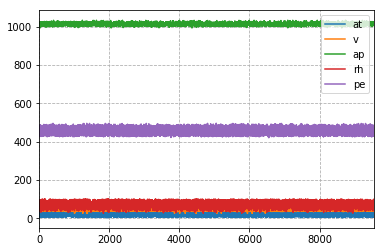

In [6]:
ax=df.plot(grid=True)

In [11]:
def ts_box(y):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=y, linewidth=2.5)
    fig.set_title('')
    fig.set_ylabel(y.name)
    fig.grid(True)
    
    plt.subplot(1, 2, 2)
    fig = y.hist(bins=20, linewidth=2.5)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(y.name)

    plt.show()

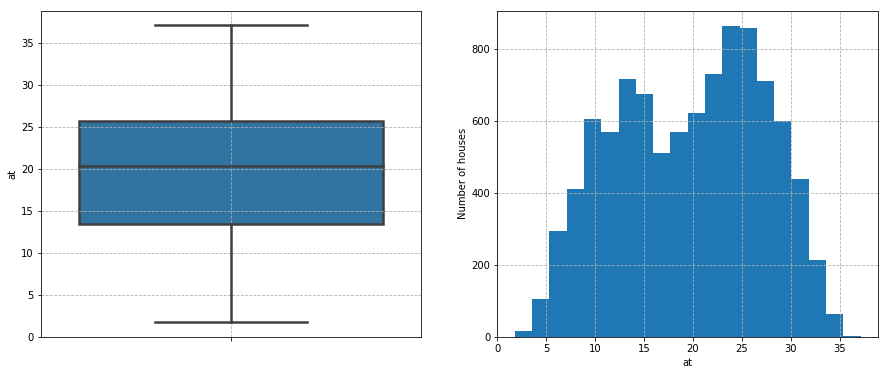

In [12]:
ts_box(df['at'])

In [13]:
LOWERBOUND, UPPERBOUND = np.percentile(df['at'], [0.5, 99.5])
LOWERBOUND

4.43795

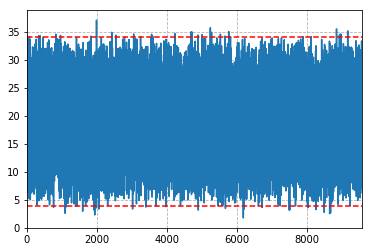

In [15]:
LOWERBOUND, UPPERBOUND = np.percentile(df['at'], [0.3, 99.7])
ax=df['at'].plot(grid=True)
ax.axhline(LOWERBOUND, color='r', linestyle='--')
ax.axhline(UPPERBOUND, color='r', linestyle='--')

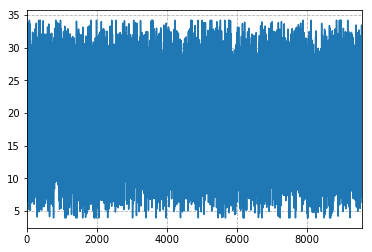

In [16]:
df['at']= df['at'].clip(lower=LOWERBOUND, upper=UPPERBOUND)
df['at'].plot(grid=True)

In [9]:
# import scipy as sp
# #UPPERBOUND, LOWERBOUND = np.percentile(df['at'], [1, 99])
# df['at']=sp.stats.mstats.winsorize(df['at'],limits=0.001);
# df['at'].plot()

### v

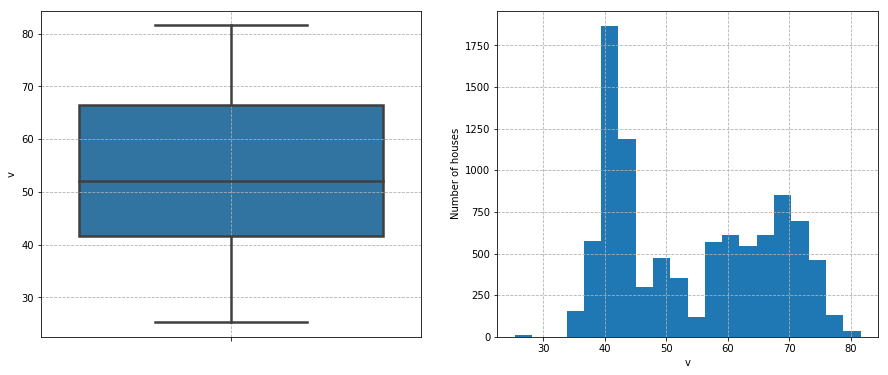

In [17]:
ts_box(df.v)

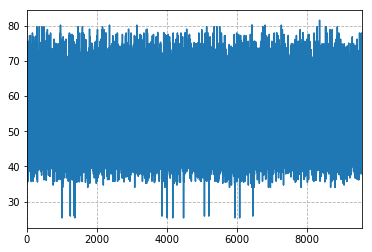

In [18]:
df.v.plot(grid=True)

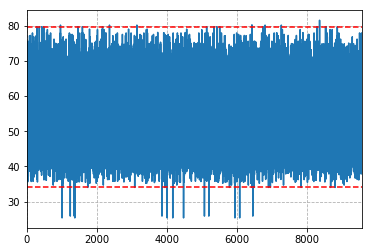

In [19]:
LOWERBOUND, UPPERBOUND = np.percentile(df.v, [0.2, 99.8])
ax=df.v.plot(grid=True)
ax.axhline(LOWERBOUND, color='r', linestyle='--')
ax.axhline(UPPERBOUND, color='r', linestyle='--')

In [13]:
# df.v=sp.stats.mstats.winsorize(df.v,limits=0.005);
# df.v.plot()

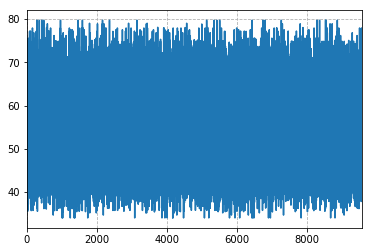

In [20]:
df.v= df.v.clip(lower=LOWERBOUND, upper=UPPERBOUND)
df.v.plot(grid=True)

### ap

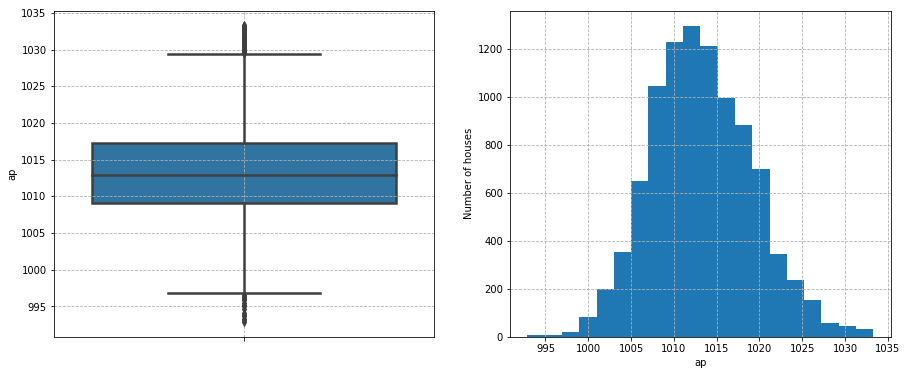

In [21]:
ts_box(df.ap)

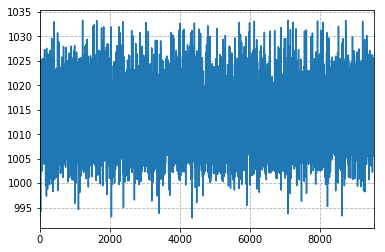

In [22]:
df.ap.plot(grid=True)

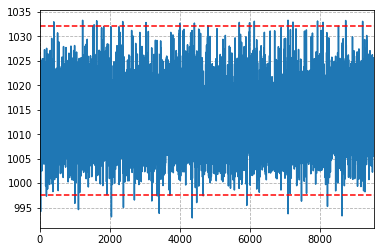

In [23]:
LOWERBOUND, UPPERBOUND = np.percentile(df.ap, [0.2, 99.8])
ax=df.ap.plot(grid=True)
ax.axhline(LOWERBOUND, color='r', linestyle='--')
ax.axhline(UPPERBOUND, color='r', linestyle='--')

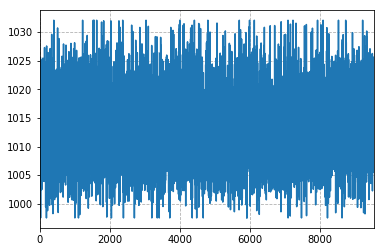

In [24]:
df.ap= df.ap.clip(lower=LOWERBOUND, upper=UPPERBOUND)
df.ap.plot(grid=True)

### rh

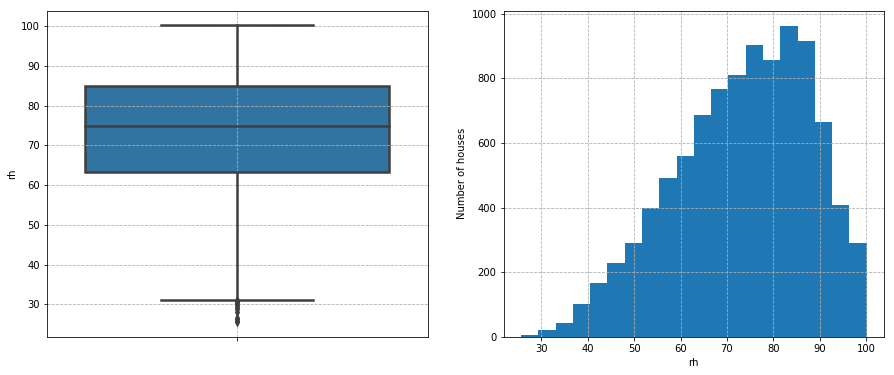

In [25]:
ts_box(df.rh)

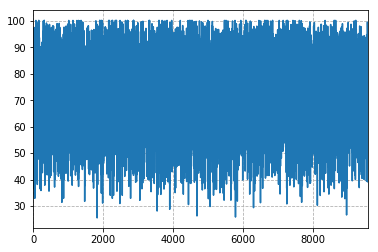

In [27]:
df.rh.plot(grid=True)

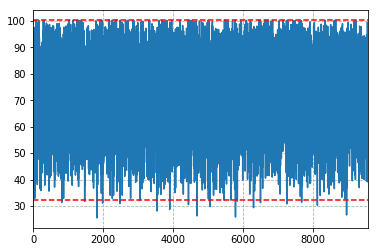

In [28]:
LOWERBOUND, UPPERBOUND = np.percentile(df.rh, [0.2, 100])
ax=df.rh.plot(grid=True)
ax.axhline(LOWERBOUND, color='r', linestyle='--')
ax.axhline(UPPERBOUND, color='r', linestyle='--')

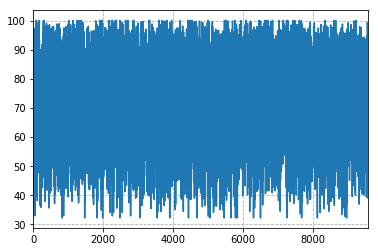

In [29]:
df.rh= df.rh.clip(lower=LOWERBOUND, upper=UPPERBOUND)
df.rh.plot(grid=True)

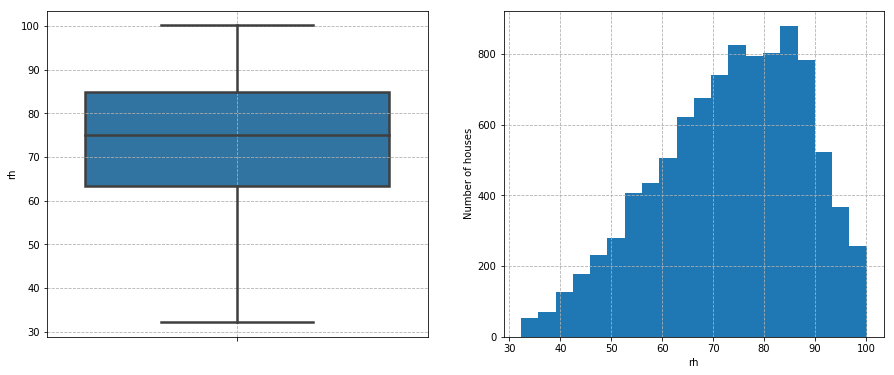

In [30]:
ts_box(df.rh)

In [24]:
df.to_csv('data/data02.csv')